# Zadanie 0.

In [158]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris

sns.set_style('whitegrid')
iris = load_iris()

In [148]:
def euclidean_distance(X, Y):  # X -> points, Y -> centroids
    dists = -2 * (X @ Y.T)
    dists += np.sum(Y ** 2, axis=1)
    dists += np.sum(X ** 2, axis=1)[:, np.newaxis]

    return np.abs(dists)

In [178]:
def k_means(data, how_many_groups, distance_func):
    data_len = len(data)
    centroids_idx = set()

    # for uniqueness sake
    while len(centroids_idx) != how_many_groups:
        centroids_idx = {np.random.randint(data_len) for _ in range(how_many_groups)}
    centroids = data[list(centroids_idx)]
    
    prev_group_mapping = np.array([42])
    curr_group_mapping = np.array([44])
    
    while not np.array_equal(prev_group_mapping, curr_group_mapping):
        # reassign objects to centroids...
        distance_matrix = distance_func(data, centroids)
        new_group_mapping = np.argsort(distance_matrix)[:, 0]
        prev_group_mapping = curr_group_mapping
        curr_group_mapping = new_group_mapping
        # ... then recalculate the centroids
        centroids = np.array([
            np.sum(group_members := data[curr_group_mapping == group_idx], 0)
            / (group_members.shape[0] or 1)  # to avoid dividing by zero
            for group_idx in range(how_many_groups)
        ])

    return curr_group_mapping

In [188]:
GROUPS_COUNT = 3

grouping = k_means(iris.data, GROUPS_COUNT, euclidean_distance)
cluster_names = np.array([f'Cluster #{idx}' for idx in range(GROUPS_COUNT)])

iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df['target'] = iris.target
iris_df['cluster'] = grouping

iris_df = iris_df.assign(target=iris.target_names[iris_df['target']])
iris_df = iris_df.assign(cluster=cluster_names[iris_df['cluster']])

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,setosa,Cluster #2
1,4.9,3.0,1.4,0.2,setosa,Cluster #2
2,4.7,3.2,1.3,0.2,setosa,Cluster #2
3,4.6,3.1,1.5,0.2,setosa,Cluster #2
4,5.0,3.6,1.4,0.2,setosa,Cluster #2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,Cluster #0
146,6.3,2.5,5.0,1.9,virginica,Cluster #1
147,6.5,3.0,5.2,2.0,virginica,Cluster #0
148,6.2,3.4,5.4,2.3,virginica,Cluster #0


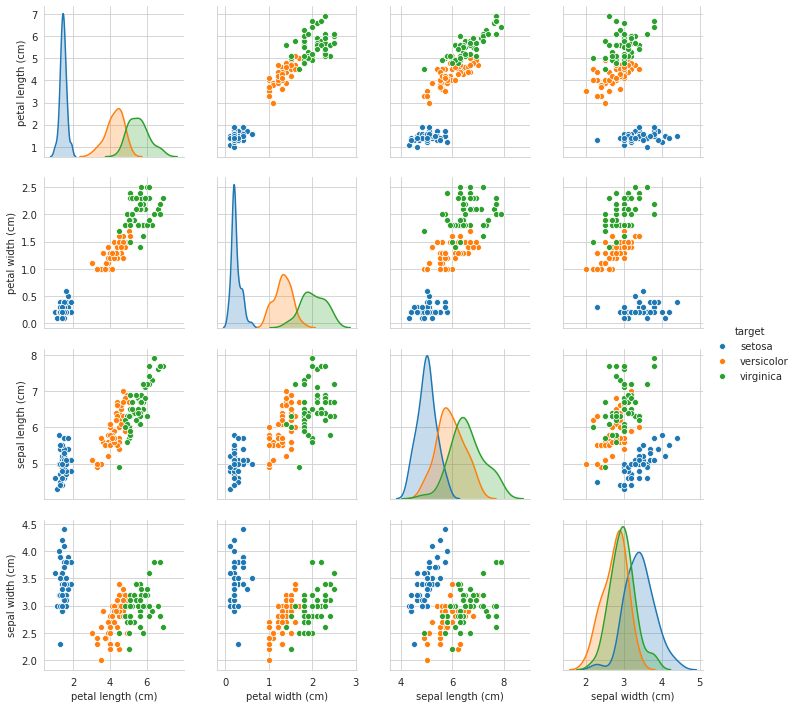

In [183]:
sns.pairplot(iris_df[set(iris_df.columns) - {'cluster'}], hue='target')

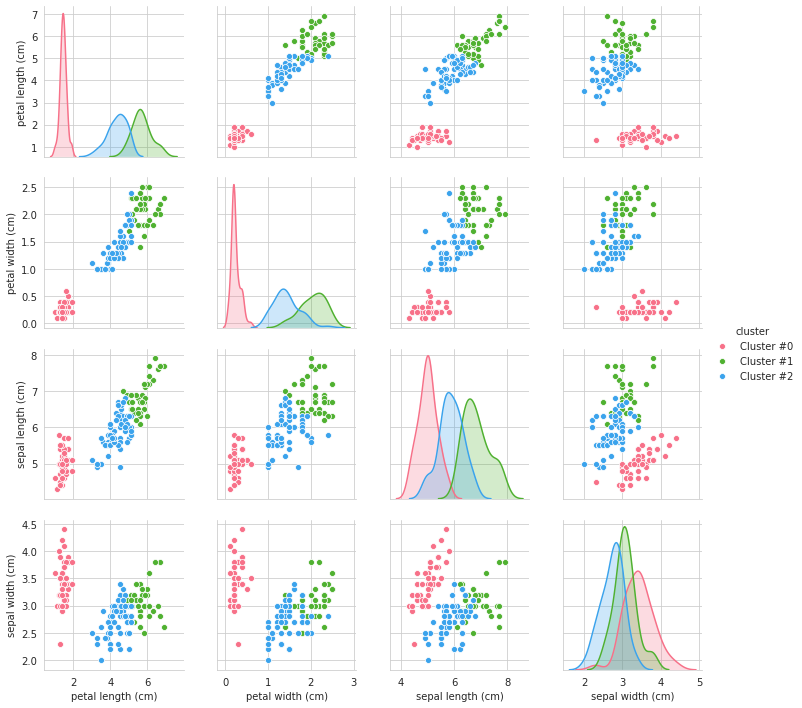

In [185]:
sns.pairplot(iris_df[set(iris_df.columns) - {'target'}], hue='cluster', palette='husl')

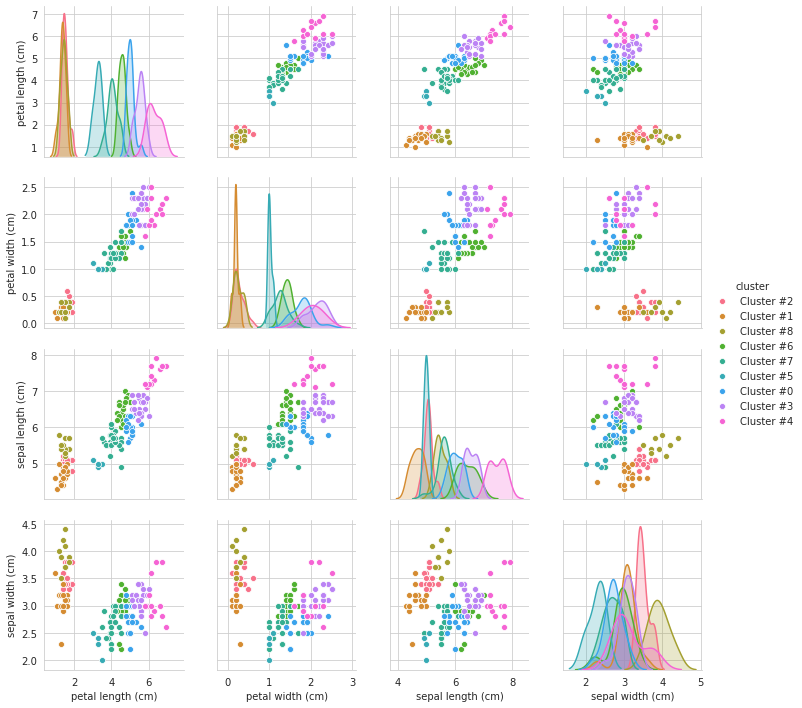

In [187]:
sns.pairplot(iris_df[set(iris_df.columns) - {'target'}], hue='cluster', palette='husl')

# Zadanie 1.